# Stickers Sold Notebook
**Author: *Kamau Wa Wainaina***

## Frame the problem and look at the big picture
The problem is trying to know sticker sales in different parts of the world. Performance will be assessed using root mean squared error.

## Get the data

In [4]:
# Libraries used in the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [5]:
path = "../../../Data/playground-series-s5e1/"
train = pd.read_csv(path+"train.csv",
                    index_col=["date"],
                    parse_dates=["date"])
test = pd.read_csv(path+"test.csv", 
                   index_col=["date"],
                   parse_dates=["date"])

## Explore data to gain insights

### Light Exploration

In [8]:
train.head()

,id,country,store,product,num_sold
date,,,,,
2010-01-01,0,Canada,Discount Stickers,Holographic Goose,NaN
2010-01-01,1,Canada,Discount Stickers,Kaggle,973.0
2010-01-01,2,Canada,Discount Stickers,Kaggle Tiers,906.0
2010-01-01,3,Canada,Discount Stickers,Kerneler,423.0
2010-01-01,4,Canada,Discount Stickers,Kerneler Dark Mode,491.0


Only number sold column is missing values.

In [10]:
train.describe(include="all")

,id,country,store,product,num_sold
count,230130.000000,230130,230130,230130,221259.000000
unique,NaN,6,3,5,NaN
top,NaN,Canada,Discount Stickers,Holographic Goose,NaN
freq,NaN,38355,76710,46026,NaN
mean,115064.500000,NaN,NaN,NaN,752.527382
std,66432.953062,NaN,NaN,NaN,690.165445
min,0.000000,NaN,NaN,NaN,5.000000
25%,57532.250000,NaN,NaN,NaN,219.000000
50%,115064.500000,NaN,NaN,NaN,605.000000
75%,172596.750000,NaN,NaN,NaN,1114.000000


### Exploratory Data Analysis

In [16]:
exploration_data = train.copy()

Let's see number sold per country

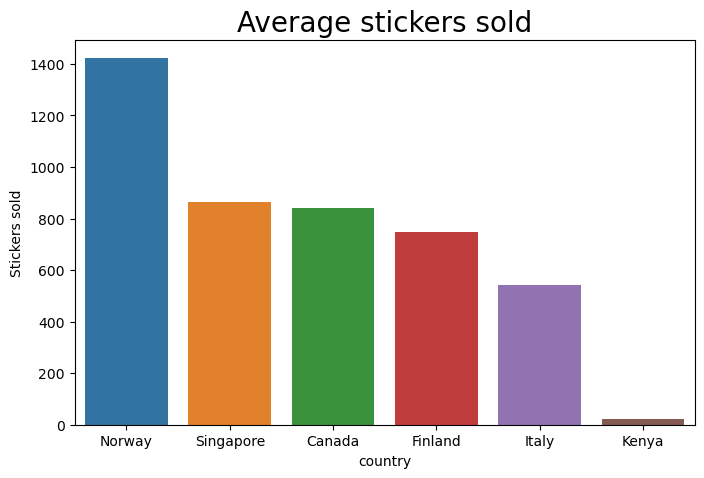

In [19]:
num_sold_country = exploration_data.groupby("country")["num_sold"].mean()
num_sold_country = num_sold_country.reset_index()
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x="country", 
            y="num_sold", 
            data=num_sold_country, 
            order=["Norway", "Singapore", "Canada", "Finland", "Italy", "Kenya"],
            ax=ax)
ax.set_ylabel("Stickers sold")
ax.set_title("Average stickers sold", size=20)
plt.show()

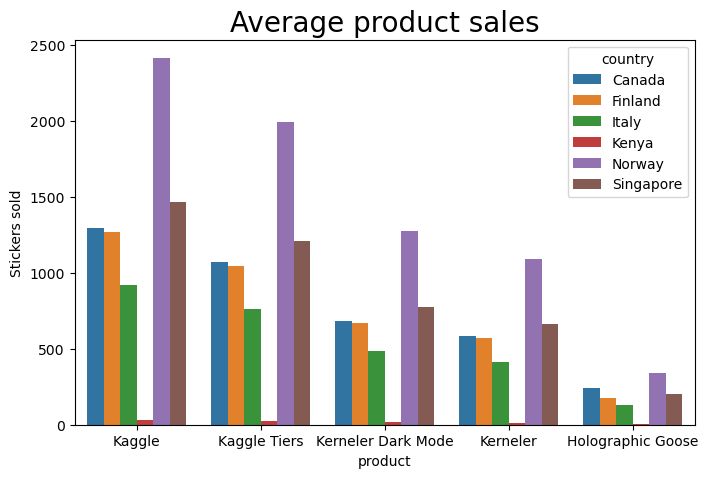

In [21]:
num_sold_product = exploration_data.groupby(["product", "country"])["num_sold"].mean().reset_index()
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x="product", 
            y="num_sold",
            hue="country",
            data=num_sold_product, 
            order=["Kaggle", "Kaggle Tiers", "Kerneler Dark Mode", "Kerneler", "Holographic Goose"],
            ax=ax)
ax.set_ylabel("Stickers sold")
ax.set_title("Average product sales", size=20)
plt.show()

In [47]:
train[(pd.isnull(train["num_sold"]))].groupby(["country", "store", "product"]).count()

id  num_sold
country store                product                           
Canada  Discount Stickers    Holographic Goose   2557         0
                             Kerneler               1         0
        Premium Sticker Mart Holographic Goose    380         0
        Stickers for Less    Holographic Goose   1308         0
Kenya   Discount Stickers    Holographic Goose   2557         0
                             Kerneler              63         0
                             Kerneler Dark Mode     1         0
        Premium Sticker Mart Holographic Goose    646         0
        Stickers for Less    Holographic Goose   1358         0

In [49]:
exp = train.reset_index().copy()

In [53]:
exp.drop("id", axis=1, inplace=True)

In [67]:
exp.head(60)

,date,country,store,product,num_sold
0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0
6,2010-01-01,Canada,Stickers for Less,Kaggle,1837.0
7,2010-01-01,Canada,Stickers for Less,Kaggle Tiers,1659.0
8,2010-01-01,Canada,Stickers for Less,Kerneler,807.0
9,2010-01-01,Canada,Stickers for Less,Kerneler Dark Mode,940.0


In [83]:
test=exp.groupby(["date", "country", "product"])["num_sold"].mean().reset_index()

In [85]:
test[pd.isnull(test["num_sold"])]

,date,country,product,num_sold
165,2010-01-06,Kenya,Holographic Goose,NaN
195,2010-01-07,Kenya,Holographic Goose,NaN
315,2010-01-11,Kenya,Holographic Goose,NaN
345,2010-01-12,Kenya,Holographic Goose,NaN
375,2010-01-13,Kenya,Holographic Goose,NaN
...,...,...,...,...
73830,2016-09-27,Canada,Holographic Goose,NaN
73860,2016-09-28,Canada,Holographic Goose,NaN
74070,2016-10-05,Canada,Holographic Goose,NaN
74220,2016-10-10,Canada,Holographic Goose,NaN
